<a href="https://colab.research.google.com/github/Marcll0/Python/blob/main/NLP_G1_covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk pandas matplotlib wordcloud

In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
import string
from nltk import sent_tokenize
from nltk.stem import RSLPStemmer, WordNetLemmatizer
from nltk.collocations import BigramAssocMeasures

In [13]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')  # necessário se quiser usar WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('rslp')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

Base de dados do G1 por Ano

In [4]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2024
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2024-01-01T00%3A00%3A00-0300&to=2024-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2024 = []
for manchete in manchetes:
    covid2024.append(manchete.text)
for i in range(len(covid2024)):
  covid2024[i] = covid2024[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [5]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2023
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2023-01-01T00%3A00%3A00-0300&to=2023-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2023 = []
for manchete in manchetes:
    covid2023.append(manchete.text)
for i in range(len(covid2023)):
  covid2023[i] = covid2023[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [6]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2022
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2022-01-01T00%3A00%3A00-0300&to=2022-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2022 = []
for manchete in manchetes:
    covid2022.append(manchete.text)
for i in range(len(covid2022)):
  covid2022[i] = covid2022[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [7]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2021
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2021-01-01T00%3A00%3A00-0300&to=2021-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2021 = []
for manchete in manchetes:
    covid2021.append(manchete.text)
for i in range(len(covid2021)):
  covid2021[i] = covid2021[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [8]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2020
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2020-01-01T00%3A00%3A00-0300&to=2020-12-01T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2020 = []
for manchete in manchetes:
    covid2020.append(manchete.text)
for i in range(len(covid2020)):
  covid2020[i] = covid2020[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [9]:
# URL da página principal do G1 buscando temais mais relevantes da covid no ano de 2025
url = "https://g1.globo.com/busca/?q=covid-19&order=relevant&from=2025-01-01T00%3A00%3A00-0300&to=2025-06-10T23%3A59%3A59-0300"

# Faz a requisição
response = requests.get(url)
print(response.status_code)
# Analisa o conteúdo com BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Encontra as manchetes principais
manchetes = soup.find_all(class_="widget--info__text-container")

covid2025 = []
for manchete in manchetes:
    covid2025.append(manchete.text)
for i in range(len(covid2025)):
  covid2025[i] = covid2025[i].replace('\n', ' ').replace("..."," ").replace("     "," ").replace("G1","").replace("  ",". ").strip()

200


In [10]:
print(covid2025)
print(covid2024)
print(covid2023)
print(covid2022)
print(covid2021)
print(covid2020)

['. . Vacinação contra Covid-19 para crianças é retomada em Jundiaí. . Vacinação contra Covid-19 para crianças é retomada em Jundiaí Reprodução/TV Globo A vacinação contra a Covid-19 para crianças. —.  do grupo prioritário para vacinação contra Covid-19 pode ser consultada por meio deste link. Veja mais notícias da região no g1 Sorocaba e Jundiaí VÍDEOS: assista às reportagens da TV TEM. 11/01/2025 17h38.', '. . Covid-19: Divinópolis confirma primeira morte pela doença em 20. .  Divinópolis confirma primeira morte por Covid-19 em 2025 Divinópolis confirmou a primeira morte por Covid-19 no município em 2025. —.  da vacinação e da prevenção, especialmente para pessoas do grupo de risco. Teste rápido mostra resultado positivo de Covid-19. 07/03/2025 18h30.', '. . Paraíba confirma 43 mortes por Covid-19 em 2025. . Vacina bivalente contra a Covid-19 é ampliada para pessoas a partir de 18 anos em cidades do Vale do Paraíba Reprodução/Agência. —.  Brasil A Paraíba confirmou 43 mortes por Covi

In [11]:
delimitador = " "

# Usando join() para transformar a lista em uma string
títulos_2025 = delimitador.join(covid2025)
títulos_2024 = delimitador.join(covid2024)
títulos_2023 = delimitador.join(covid2023)
títulos_2022 = delimitador.join(covid2022)
títulos_2021 = delimitador.join(covid2021)
títulos_2020 = delimitador.join(covid2020)

NLP para análise dos títulos das matérias, por ano;

Analisar  e estudar as maiores frequencias de palavras;

Top 10 palavras mais frequentes:
mort: 10
confirm: 8
ano: 8
vacin: 7
pesso: 6
ca: 6
contr: 5
sorocab: 5
prim: 5
boletim: 5


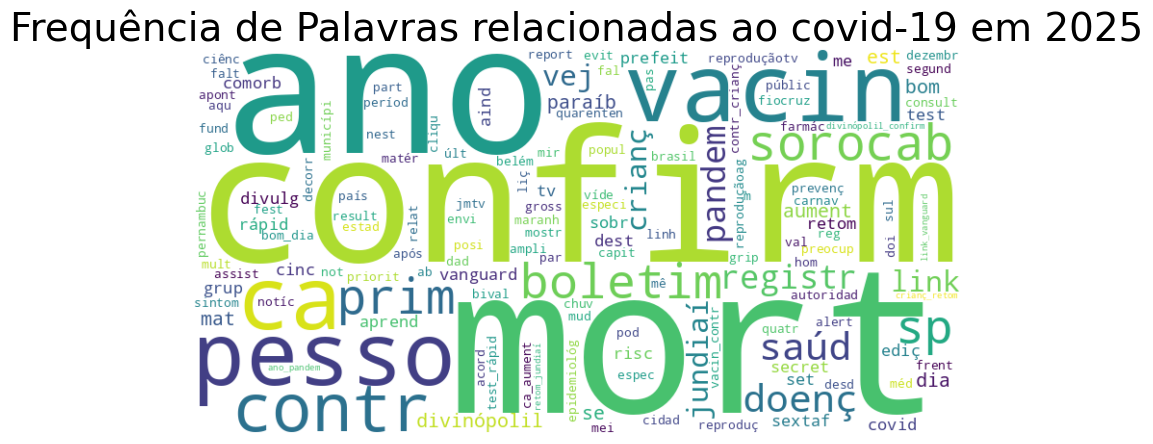

In [14]:
# 1. Segmentação de sentenças
sentencas = sent_tokenize(títulos_2025.lower(), language='portuguese')

# 2. Remoção de pontuação + 3. Tokenização
tokens = []
for sent in sentencas:
    sent_sem_pontuacao = sent.translate(str.maketrans('', '', string.punctuation))
    tokens.extend(word_tokenize(sent_sem_pontuacao, language='portuguese'))

# 4. Remoção de stopwords
stopwords_pt = stopwords.words('portuguese')
tokens_filtrados = [t for t in tokens if t.isalpha() and t not in stopwords_pt]

# 5. Stemming
stemmer = RSLPStemmer()
tokens_stem = [stemmer.stem(t) for t in tokens_filtrados]

# 6. Lematização (limitada para português usando WordNet)
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(t) for t in tokens_stem]  # Alternativa melhor: usar spaCy pt_core_news_sm

# Frequência de unigramas
frequencia_unigramas = Counter(tokens_lematizados)

# Bigramas
finder = BigramCollocationFinder.from_words(tokens_lematizados)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

frequencia_bigramas = Counter(bigrams_formatados)

# Junta unigramas + bigramas
frequencia_total = frequencia_unigramas + frequencia_bigramas

# Exibe as 10 mais frequentes
print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

# WordCloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2025", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
vacin: 17
contr: 14
test: 7
confirm: 7
prefeit: 6
mort: 6
nest: 5
ano: 5
sant: 4
jorn: 4


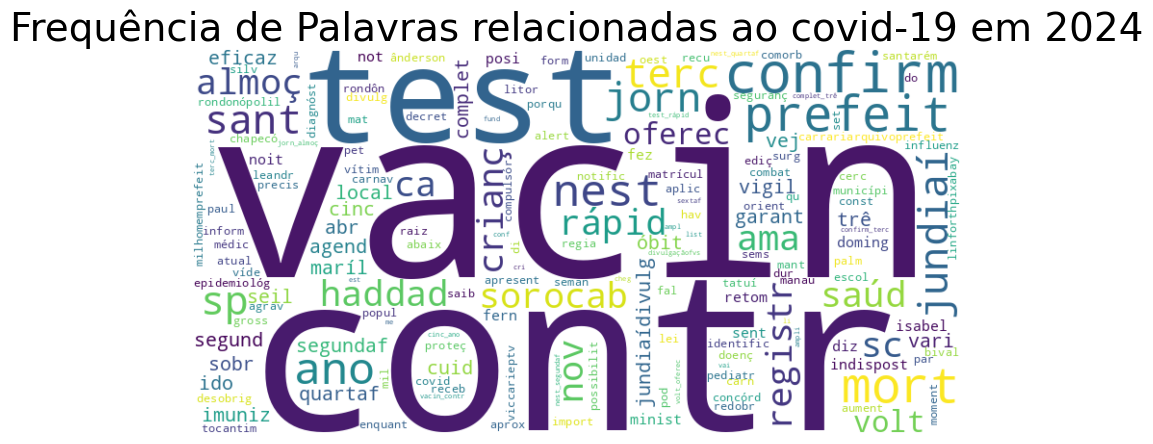

In [15]:
# 1. Segmentação de sentenças
sentencas = sent_tokenize(títulos_2024.lower(), language='portuguese')

# 2. Remoção de pontuação + 3. Tokenização
tokens = []
for sent in sentencas:
    sent_sem_pontuacao = sent.translate(str.maketrans('', '', string.punctuation))
    tokens.extend(word_tokenize(sent_sem_pontuacao, language='portuguese'))

# 4. Remoção de stopwords
stopwords_pt = stopwords.words('portuguese')
tokens_filtrados = [t for t in tokens if t.isalpha() and t not in stopwords_pt]

# 5. Stemming
stemmer = RSLPStemmer()
tokens_stem = [stemmer.stem(t) for t in tokens_filtrados]

# 6. Lematização (limitada para português usando WordNet)
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(t) for t in tokens_stem]  # Alternativa melhor: usar spaCy pt_core_news_sm

# Frequência de unigramas
frequencia_unigramas = Counter(tokens_lematizados)

# Bigramas
finder = BigramCollocationFinder.from_words(tokens_lematizados)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

frequencia_bigramas = Counter(bigrams_formatados)

# Junta unigramas + bigramas
frequencia_total = frequencia_unigramas + frequencia_bigramas

# Exibe as 10 mais frequentes
print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

# WordCloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2024", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
vacin: 21
contr: 19
sergip: 11
nov: 10
grip: 9
ca: 9
nest: 9
registr: 8
saúd: 7
test: 6


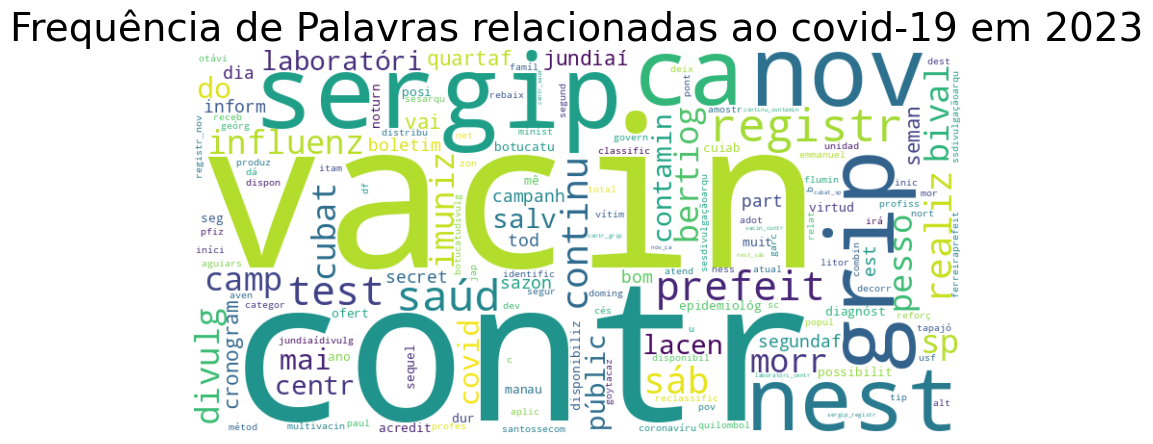

In [16]:
# 1. Segmentação de sentenças
sentencas = sent_tokenize(títulos_2023.lower(), language='portuguese')

# 2. Remoção de pontuação + 3. Tokenização
tokens = []
for sent in sentencas:
    sent_sem_pontuacao = sent.translate(str.maketrans('', '', string.punctuation))
    tokens.extend(word_tokenize(sent_sem_pontuacao, language='portuguese'))

# 4. Remoção de stopwords
stopwords_pt = stopwords.words('portuguese')
tokens_filtrados = [t for t in tokens if t.isalpha() and t not in stopwords_pt]

# 5. Stemming
stemmer = RSLPStemmer()
tokens_stem = [stemmer.stem(t) for t in tokens_filtrados]

# 6. Lematização (limitada para português usando WordNet)
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(t) for t in tokens_stem]  # Alternativa melhor: usar spaCy pt_core_news_sm

# Frequência de unigramas
frequencia_unigramas = Counter(tokens_lematizados)

# Bigramas
finder = BigramCollocationFinder.from_words(tokens_lematizados)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

frequencia_bigramas = Counter(bigrams_formatados)

# Junta unigramas + bigramas
frequencia_total = frequencia_unigramas + frequencia_bigramas

# Exibe as 10 mais frequentes
print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

# WordCloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2023", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
test: 13
ca: 11
registr: 10
posi: 9
nest: 9
segundaf: 7
diagnostic: 7
contr: 6
divulg: 5
nov: 5


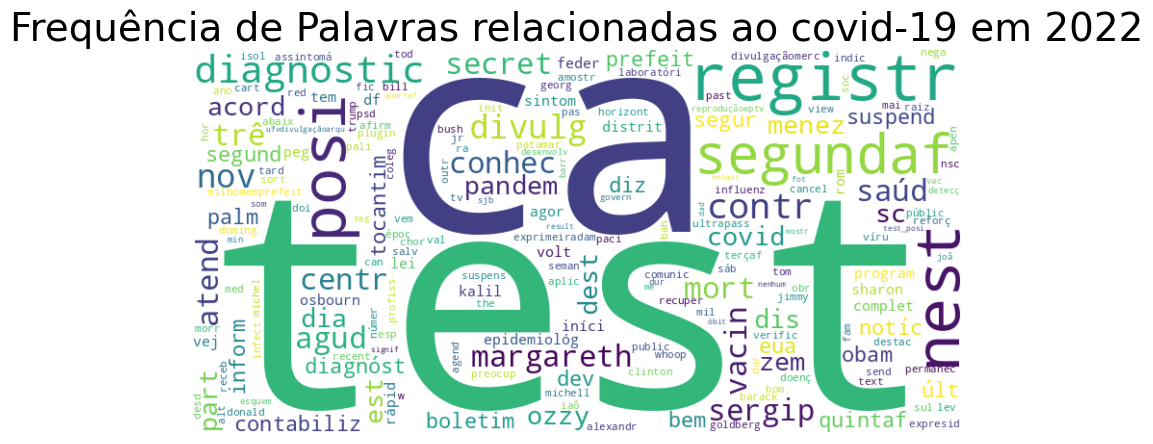

In [17]:
# 1. Segmentação de sentenças
sentencas = sent_tokenize(títulos_2022.lower(), language='portuguese')

# 2. Remoção de pontuação + 3. Tokenização
tokens = []
for sent in sentencas:
    sent_sem_pontuacao = sent.translate(str.maketrans('', '', string.punctuation))
    tokens.extend(word_tokenize(sent_sem_pontuacao, language='portuguese'))

# 4. Remoção de stopwords
stopwords_pt = stopwords.words('portuguese')
tokens_filtrados = [t for t in tokens if t.isalpha() and t not in stopwords_pt]

# 5. Stemming
stemmer = RSLPStemmer()
tokens_stem = [stemmer.stem(t) for t in tokens_filtrados]

# 6. Lematização (limitada para português usando WordNet)
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(t) for t in tokens_stem]  # Alternativa melhor: usar spaCy pt_core_news_sm

# Frequência de unigramas
frequencia_unigramas = Counter(tokens_lematizados)

# Bigramas
finder = BigramCollocationFinder.from_words(tokens_lematizados)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

frequencia_bigramas = Counter(bigrams_formatados)

# Junta unigramas + bigramas
frequencia_total = frequencia_unigramas + frequencia_bigramas

# Exibe as 10 mais frequentes
print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

# WordCloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2022", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
cpi: 16
covid: 15
natuz: 12
nery: 12
espec: 7
coment: 6
vacin: 6
mort: 5
te: 4
explic: 4


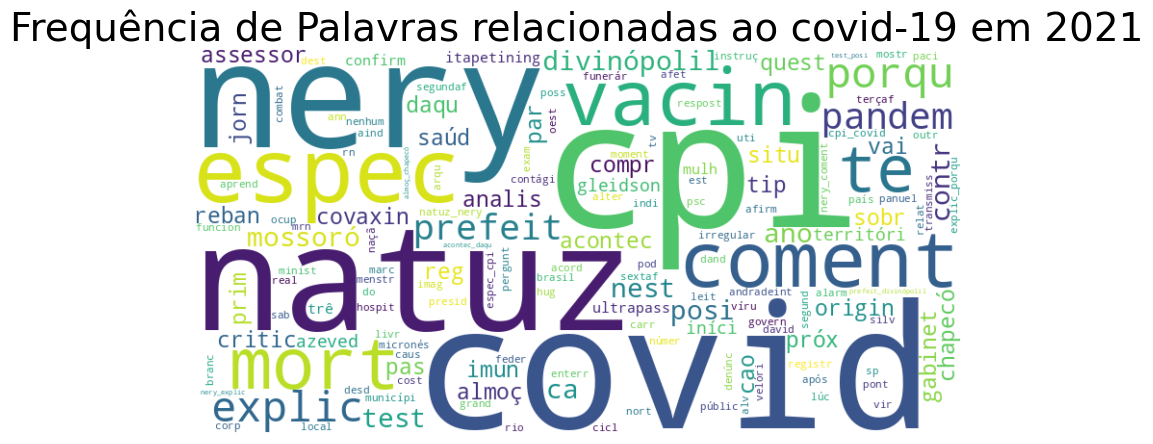

In [18]:
# 1. Segmentação de sentenças
sentencas = sent_tokenize(títulos_2021.lower(), language='portuguese')

# 2. Remoção de pontuação + 3. Tokenização
tokens = []
for sent in sentencas:
    sent_sem_pontuacao = sent.translate(str.maketrans('', '', string.punctuation))
    tokens.extend(word_tokenize(sent_sem_pontuacao, language='portuguese'))

# 4. Remoção de stopwords
stopwords_pt = stopwords.words('portuguese')
tokens_filtrados = [t for t in tokens if t.isalpha() and t not in stopwords_pt]

# 5. Stemming
stemmer = RSLPStemmer()
tokens_stem = [stemmer.stem(t) for t in tokens_filtrados]

# 6. Lematização (limitada para português usando WordNet)
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(t) for t in tokens_stem]  # Alternativa melhor: usar spaCy pt_core_news_sm

# Frequência de unigramas
frequencia_unigramas = Counter(tokens_lematizados)

# Bigramas
finder = BigramCollocationFinder.from_words(tokens_lematizados)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

frequencia_bigramas = Counter(bigrams_formatados)

# Junta unigramas + bigramas
frequencia_total = frequencia_unigramas + frequencia_bigramas

# Exibe as 10 mais frequentes
print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

# WordCloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2021", fontsize=28, loc='center')
plt.show()

Top 10 palavras mais frequentes:
mort: 14
registr: 11
ca: 10
segund: 8
nov: 8
confirm: 8
coronavíru: 6
doenç: 6
prefeit: 6
sergip: 5


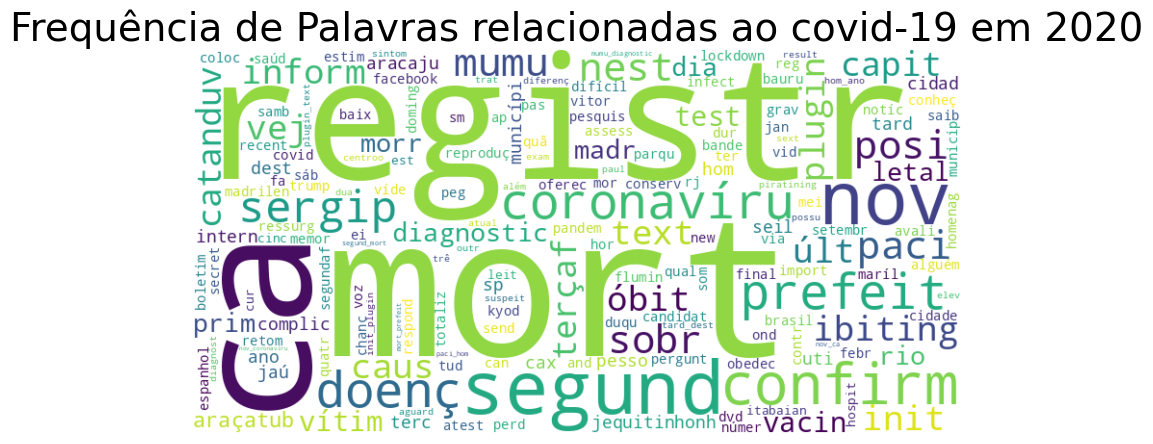

In [19]:
# 1. Segmentação de sentenças
sentencas = sent_tokenize(títulos_2020.lower(), language='portuguese')

# 2. Remoção de pontuação + 3. Tokenização
tokens = []
for sent in sentencas:
    sent_sem_pontuacao = sent.translate(str.maketrans('', '', string.punctuation))
    tokens.extend(word_tokenize(sent_sem_pontuacao, language='portuguese'))

# 4. Remoção de stopwords
stopwords_pt = stopwords.words('portuguese')
tokens_filtrados = [t for t in tokens if t.isalpha() and t not in stopwords_pt]

# 5. Stemming
stemmer = RSLPStemmer()
tokens_stem = [stemmer.stem(t) for t in tokens_filtrados]

# 6. Lematização (limitada para português usando WordNet)
lemmatizer = WordNetLemmatizer()
tokens_lematizados = [lemmatizer.lemmatize(t) for t in tokens_stem]  # Alternativa melhor: usar spaCy pt_core_news_sm

# Frequência de unigramas
frequencia_unigramas = Counter(tokens_lematizados)

# Bigramas
finder = BigramCollocationFinder.from_words(tokens_lematizados)
bigrams = finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
bigrams_formatados = ['_'.join(b) for b in bigrams]

frequencia_bigramas = Counter(bigrams_formatados)

# Junta unigramas + bigramas
frequencia_total = frequencia_unigramas + frequencia_bigramas

# Exibe as 10 mais frequentes
print("Top 10 palavras mais frequentes:")
for palavra, freq in frequencia_total.most_common(10):
    print(f"{palavra}: {freq}")

# WordCloud
wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequencia_total)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Frequência de Palavras relacionadas ao covid-19 em 2020", fontsize=28, loc='center')
plt.show()